In [1]:
%reload_ext autoreload
%autoreload 2

In [ ]:
import sys, os

# Get absolute path to the project root (2 levels up)
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(PROJECT_ROOT)

sys.path.append("/cluster/home/herminea/mental_health_project/workspace/utils")
sys.path.append("/cluster/home/herminea/mental_health_project/workspace/scripts")
sys.path.append("/cluster/home/herminea/mental_health_project/workspace/vlmd")

In [ ]:
import os, sys, glob
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Add utils to path (if you already created them)
sys.path.append("/cluster/home/herminea/mental_health_project/workspace/utils")

from workspace.utils.io.io_fmriprep import (
    load_subject_list,
    find_fmriprep_rest_bold,
    revert_to_meta_id,
    normalize_subject_id
)
from workspace.utils.preparation.metadata import load_metadata, match_mdd_hc


In [ ]:
DATA_DIR = "/cluster/projects/itea_lille-ie/Transdiagnostic/output/fmriprep-25.1.4"

PHENO_PATH = "/cluster/home/herminea/mental_health_project/workspace/data/tcp_dataset/ds005237/phenotype/demos.tsv"

HC_LIST = "/cluster/home/herminea/mental_health_project/workspace/data/subjects_lists/subjects_hc.txt"
MDD_LIST = "/cluster/home/herminea/mental_health_project/workspace/data/subjects_lists/subjects_mdd_primary.txt"

OUT_DIR = "/cluster/home/herminea/mental_health_project/workspace/data/subjects_lists"
os.makedirs(OUT_DIR, exist_ok=True)


In [5]:
hc_subjects = load_subject_list(HC_LIST)
mdd_subjects = load_subject_list(MDD_LIST)

print(f"HC subjects: {len(hc_subjects)}")
print(f"MDD subjects: {len(mdd_subjects)}")


[IO] Loaded 93 subjects from /cluster/home/herminea/mental_health_project/test/data/subjects_lists/subjects_hc.txt
[IO] Loaded 21 subjects from /cluster/home/herminea/mental_health_project/test/data/subjects_lists/subjects_mdd_primary.txt
HC subjects: 93
MDD subjects: 21


In [6]:
hc_files = find_fmriprep_rest_bold(hc_subjects, DATA_DIR)
mdd_files = find_fmriprep_rest_bold(mdd_subjects, DATA_DIR)

hc_available_meta_ids = [revert_to_meta_id(s) for s in hc_files.keys()]
mdd_available_meta_ids = [revert_to_meta_id(s) for s in mdd_files.keys()]

print(f"HC subjects with fMRIPrep data: {len(hc_available_meta_ids)} / {len(hc_subjects)}")
print(f"MDD subjects with fMRIPrep data: {len(mdd_available_meta_ids)} / {len(mdd_subjects)}")


Missing func directory for sub-NDARINVTY904UNB
Missing func directory for sub-NDARINVGW978HUP
Missing func directory for sub-NDARINVHR360FAK
Found resting-state data for 90 / 93 subjects
Found resting-state data for 21 / 21 subjects
HC subjects with fMRIPrep data: 90 / 93
MDD subjects with fMRIPrep data: 21 / 21


In [7]:
meta = load_metadata(PHENO_PATH)

matched_df = match_mdd_hc(meta, mdd_available_meta_ids, hc_available_meta_ids)

print(matched_df)
print(f"Matched {len(matched_df)} pairs")


No HC subjects with sex = O; using all HCs as fallback.
Matched 21 pairs total
         MDD_subject        HC_subject
0   NDAR_INVLT949NAG  NDAR_INVDK220VPQ
1   NDAR_INVLD269XMU  NDAR_INVJT253NWQ
2   NDAR_INVWU297KRB  NDAR_INVZB896FPZ
3   NDAR_INVUX642KUY  NDAR_INVXJ707NAE
4   NDAR_INVEY681MZ7  NDAR_INVWL810FRT
5   NDAR_INVHW100CDA  NDAR_INVWE937RD6
6   NDAR_INVTR059ATR  NDAR_INVKX727WL8
7   NDAR_INVRC807HPA  NDAR_INVDC524THW
8   NDAR_INVUY799LKJ  NDAR_INVKH965NN0
9   NDAR_INVKH279ZDZ  NDAR_INVFW143KVU
10  NDAR_INVVP179WTP  NDAR_INVGN082RP7
11  NDAR_INVUZ656BRT  NDAR_INVXM223BAP
12  NDAR_INVXA261ZAL  NDAR_INVDD155BRR
13  NDAR_INVRX371YHK  NDAR_INVPG675JPX
14  NDAR_INVWR872ZDB  NDAR_INVAL101MH2
15  NDAR_INVZU586UPF  NDAR_INVKD900ED7
16  NDAR_INVNB949AXM  NDAR_INVHG032NYJ
17  NDAR_INVJP751NXV  NDAR_INVWJ708RM0
18  NDAR_INVZY232VM1  NDAR_INVCW125BLA
19  NDAR_INVDP288XND  NDAR_INVDM785DVB
20  NDAR_INVBL733HBP  NDAR_INVUA181LXU
Matched 21 pairs


/cluster/home/herminea/.conda/envs/neuro/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/cluster/home/herminea/.conda/envs/neuro/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/cluster/home/herminea/.conda/envs/neuro/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/cluster/home/herminea/.conda/envs/neuro/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/cluster/home/herminea/.conda/envs/neuro/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarn

In [8]:
print("Duplicate MDDs:", matched_df["MDD_subject"].duplicated().sum())
print("Duplicate HCs:", matched_df["HC_subject"].duplicated().sum())

meta_indexed = meta.set_index("subjectkey")
mdd_ages = meta_indexed.loc[matched_df["MDD_subject"], "age_years"].values
hc_ages  = meta_indexed.loc[matched_df["HC_subject"],  "age_years"].values

print(f"Mean absolute age difference: {np.mean(np.abs(mdd_ages - hc_ages)):.2f} years")


Duplicate MDDs: 0
Duplicate HCs: 0
Mean absolute age difference: 0.45 years


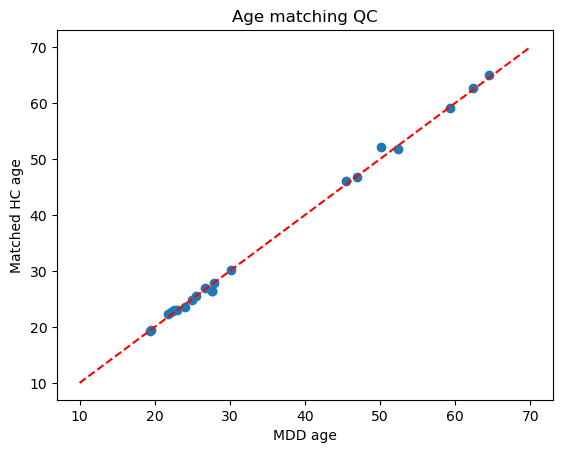

In [9]:
import matplotlib.pyplot as plt
plt.scatter(mdd_ages, hc_ages)
plt.plot([10,70],[10,70],'r--')
plt.xlabel("MDD age"); plt.ylabel("Matched HC age")
plt.title("Age matching QC")
plt.show()


In [10]:
matched_mdd = matched_df["MDD_subject"].to_csv(os.path.join(OUT_DIR, "mdd_subjects_matched.txt"), index=False, header=False)
matched_hc = matched_df["HC_subject"].to_csv(os.path.join(OUT_DIR, "hc_subjects_matched.txt"), index=False, header=False)

print("Saved matched lists:")
print(os.path.join(OUT_DIR, "mdd_subjects_matched.txt"))
print(os.path.join(OUT_DIR, "hc_subjects_matched.txt"))


Saved matched lists:
/cluster/home/herminea/mental_health_project/test/data/subjects_lists/mdd_subjects_matched.txt
/cluster/home/herminea/mental_health_project/test/data/subjects_lists/hc_subjects_matched.txt


#### Load data

In [ ]:
# Load matched subject lists
matched_mdd = [line.strip() for line in open("/cluster/home/herminea/mental_health_project/workspace/data/subjects_lists/mdd_subjects_matched.txt")]
matched_hc = [line.strip() for line in open("/cluster/home/herminea/mental_health_project/workspace/data/subjects_lists/hc_subjects_matched.txt")]

# Normalize to fMRIPrep IDs (e.g., NDAR_INVxxx -> sub-NDARINVxxx)
mdd_subjects = [normalize_subject_id(s) for s in matched_mdd]
hc_subjects = [normalize_subject_id(s) for s in matched_hc]

# Re-find resting-state BOLD runs
mdd_files = find_fmriprep_rest_bold(mdd_subjects, DATA_DIR)
hc_files = find_fmriprep_rest_bold(hc_subjects, DATA_DIR)


Found resting-state data for 21 / 21 subjects
Found resting-state data for 21 / 21 subjects


In [ ]:
import h5py
import numpy as np

parc_data = "/cluster/home/herminea/mental_health_project/workspace/data/roi_timeseries/sub-NDARINVWU297KRB_roi_timeseries.h5"

with h5py.File(parc_data, "r") as f:
    # List contents
    print("Keys:", list(f.keys()))
    
    for key in f.keys():
        print(f"{key}: shape {f[key].shape}, dtype {f[key].dtype}")
    
    # Print attributes
    for k, v in f.attrs.items():
        print(f"{k}: {v}")


Keys: ['sub-NDARINVWU297KRB_task-restAP_run-01_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold', 'sub-NDARINVWU297KRB_task-restAP_run-02_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold', 'sub-NDARINVWU297KRB_task-restPA_run-01_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold', 'sub-NDARINVWU297KRB_task-restPA_run-02_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold']
sub-NDARINVWU297KRB_task-restAP_run-01_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold: shape (434, 488), dtype float32
sub-NDARINVWU297KRB_task-restAP_run-02_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold: shape (434, 488), dtype float32
sub-NDARINVWU297KRB_task-restPA_run-01_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold: shape (434, 488), dtype float32
sub-NDARINVWU297KRB_task-restPA_run-02_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold: shape (434, 488), dtype float32
TR: 0.8
atlas: Schaefer2018_400Parcels_17Networks_order_FSLMNI152_2mm.nii.gz, Tian_Subcortex_S2_3T.nii.gz, atl-Buckner7_space-MNI_dseg.ni